In [ ]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 432.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

In [ ]:
pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.1/420.1 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.0 MB/s eta 0:00:00


# Chat model

In [ ]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for OpenAI: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-4o-mini", model_provider="openai")

# Embedding model

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Vector store

Opción en memoria

In [ ]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store_xd = InMemoryVectorStore(embeddings)

Opción AstraDB

In [ ]:
pip install -qU langchain-astradb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 23.6 MB/s eta 0:00:00


In [ ]:
from langchain_astradb import AstraDBVectorStore

vector_store = AstraDBVectorStore(
    embedding=embeddings,
    api_endpoint=ASTRA_DB_API_ENDPOINT,
    collection_name="astra_vector_langchain",
    token=ASTRA_DB_APPLICATION_TOKEN,
    namespace=ASTRA_DB_NAMESPACE,
)

Opción faiss

In [ ]:
pip install -qU langchain-community faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 48.2 MB/s eta 0:00:00


In [ ]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

embedding_dim = len(embeddings.embed_query("hello world"))
index = faiss.IndexFlatL2(embedding_dim)

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

# Implementación

In [ ]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict

# Load and chunk contents of the blog
loader = WebBaseLoader(
    web_paths=("https://admisiones.unal.edu.co/pregrado/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header", "frame frame-default frame-type-textmedia frame-layout-0")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

# Index chunks
_ = vector_store.add_documents(documents=all_splits)

# Define prompt for question-answering
prompt = hub.pull("rlm/rag-prompt")


# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str


# Define application steps
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

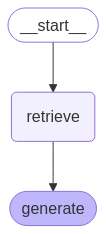

In [ ]:
graph

In [ ]:
response = graph.invoke({"question": "Hola, cuales son las fechas DEL PROCESO DE ADMISIÓN A PROGRAMAS CURRICULARES 2025-02"})
print(response["answer"])

Las fechas del proceso de admisión a programas curriculares 2025-02 son: pagar y formalizar la inscripción del 17 de febrero al 18 de marzo de 2025, presentar la prueba de admisión el 27 de abril de 2025, y consultar resultados de admitidos el 15 de mayo de 2025. Además, si es admitido, debe enviar documentos entre el 19 y 23 de mayo de 2025.


# Detalles

## 1. Indexing

## Loading documents

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content", "frame frame-default frame-type-textmedia frame-layout-0"))
loader = WebBaseLoader(
    #web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    web_paths=("https://admisiones.unal.edu.co/pregrado/",),
    bs_kwargs={"parse_only": bs4_strainer},
)
docs = loader.load()

assert len(docs) == 1
print(f"Total characters: {len(docs[0].page_content)}")

Total characters: 4247


In [ ]:
print(docs[0].page_content[:500])

 Convocatoria de admisión para el periodo 2025-02FECHAS DEL PROCESO DE ADMISIÓN A PROGRAMAS CURRICULARES 2025-02Pagar los derechos de inscripción: Del 17 de febrero al 18 de marzo de 2025Formalizar la inscripción: Del 17 de febrero al 18 de marzo de 2025Consultar la citación para presentar la prueba de admisión: A partir del 7 de abril de 2025PRESENTAR LA PRUEBA DE ADMISIÓN:  Domingo 27 de abril de 2025Consultar el puntaje obtenido en la prueba de admisión: 7 de mayo de 2025Inscribir un programa


https://python.langchain.com/docs/how_to/#document-loaders


## Splitting documents

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 6 sub-documents.


## Storing documents

In [ ]:
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

['a82243b4-5e0c-4e12-8078-643f159a23b6', 'fcb22ffb-4eef-474e-a8c2-2ad0b5798104', '6f9cb8b8-e74c-4839-9f18-adfb55d4e539']


In [ ]:
document_ids_xd = vector_store_xd.add_documents(documents=all_splits)

print(document_ids_xd[:3])

['80f3468b-7a8e-4265-86a3-04a41d5386c0', '32ab25f8-a130-471a-90c8-d387f96435a5', '6993d6e6-dfbc-4c56-9cce-fb31998798ae']


## 2. Retrieval and Generation

In [ ]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


## State

In [ ]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

## Nodes

In [ ]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"]) #similarity search en vector store, la base de datos vectorial
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

## control flow

In [ ]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

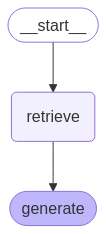

In [ ]:
graph

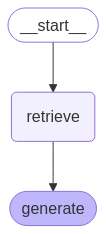

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

## Usage

In [ ]:
result = graph.invoke({"question": "Cuales son las fechas del proceso de admisión?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='a82243b4-5e0c-4e12-8078-643f159a23b6', metadata={'source': 'https://admisiones.unal.edu.co/pregrado/', 'start_index': 1}, page_content='Convocatoria de admisión para el periodo 2025-02FECHAS DEL PROCESO DE ADMISIÓN A PROGRAMAS CURRICULARES 2025-02Pagar los derechos de inscripción: Del 17 de febrero al 18 de marzo de 2025Formalizar la inscripción: Del 17 de febrero al 18 de marzo de 2025Consultar la citación para presentar la prueba de admisión: A\xa0partir del 7 de abril de 2025PRESENTAR LA PRUEBA DE ADMISIÓN:\xa0 Domingo 27 de abril de 2025Consultar el puntaje obtenido en la prueba de admisión: 7 de mayo de 2025Inscribir un programa curricular (Puntaje mayor o igual a 450): Del 7 al 12 de mayo de 2025CONSULTAR RESULTADOS ADMITIDOS: 15 de mayo de 2025Si es admitido, enviar los documentos requeridos a la respectiva División de Registro y Matrícula, teniendo en cuenta el calendario establecido: Del 19 al\xa0 23 de\xa0 mayo de 2025FECHAS IMPORTANTES PARA ASPIRANTES 

## stream steps

In [ ]:
for step in graph.stream(
    {"question": "Cuales son las fechas del proceso de admisión?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(id='a82243b4-5e0c-4e12-8078-643f159a23b6', metadata={'source': 'https://admisiones.unal.edu.co/pregrado/', 'start_index': 1}, page_content='Convocatoria de admisión para el periodo 2025-02FECHAS DEL PROCESO DE ADMISIÓN A PROGRAMAS CURRICULARES 2025-02Pagar los derechos de inscripción: Del 17 de febrero al 18 de marzo de 2025Formalizar la inscripción: Del 17 de febrero al 18 de marzo de 2025Consultar la citación para presentar la prueba de admisión: A\xa0partir del 7 de abril de 2025PRESENTAR LA PRUEBA DE ADMISIÓN:\xa0 Domingo 27 de abril de 2025Consultar el puntaje obtenido en la prueba de admisión: 7 de mayo de 2025Inscribir un programa curricular (Puntaje mayor o igual a 450): Del 7 al 12 de mayo de 2025CONSULTAR RESULTADOS ADMITIDOS: 15 de mayo de 2025Si es admitido, enviar los documentos requeridos a la respectiva División de Registro y Matrícula, teniendo en cuenta el calendario establecido: Del 19 al\xa0 23 de\xa0 mayo de 2025FECHAS IMPORTANTES 

## stream tokens

In [ ]:
for message, metadata in graph.stream(
    {"question": "Cuales son las fechas del proceso de admisión?"}, stream_mode="messages"
):
    print(message.content, end="|")

|Las| fechas| del| proceso| de| adm|isión| para| el| periodo| |202|5|-|02| son| las| siguientes|:| pagar| y| formal|izar| la| inscripción| del| |17| de| febrero| al| |18| de| marzo| de| |202|5|,| presentar| la| prueba| de| adm|isión| el| |27| de| abril| de| |202|5|,| y| consultar| los| resultados| de| admit|idos| el| |15| de| mayo| de| |202|5|.| Además|,| si| es| admit|ido|,| debe| enviar| los| documentos| requer|idos| entre| el| |19| y| el| |23| de| mayo| de| |202|5|.| Para| los| que| no| fueron| admit|idos|,| podrán| ins|cribir| programas| con| cup|os| disponibles| del| |6| al| |11| de| junio| de| |202|5|.||

## Query analisis

In [ ]:
total_documents = len(all_splits)
third = total_documents // 3

for i, document in enumerate(all_splits):
    if i < third:
        document.metadata["section"] = "beginning"
    elif i < 2 * third:
        document.metadata["section"] = "middle"
    else:
        document.metadata["section"] = "end"


all_splits[0].metadata

{'source': 'https://admisiones.unal.edu.co/pregrado/',
 'start_index': 1,
 'section': 'beginning'}

In [ ]:
total_documents

6